<a href="https://colab.research.google.com/github/Skkkiiideeee/AIML/blob/main/bankmarketingsystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
bank=pd.read_csv(r"/content/bank.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [ ]:
bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
def tocheckunique(Sheet):
    for i in Sheet:
        print(i,'\n')
        print(Sheet[i].unique(),'\n')

In [ ]:
tocheckunique(bank)

age 

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89] 

job 

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'] 

marital 

['married' 'single' 'divorced'] 

education 

['secondary' 'tertiary' 'primary' 'unknown'] 

default 

['no' 'yes'] 

balance 

[2343   45 1270 ... 1594 2593 -134] 

housing 

['yes' 'no'] 

loan 

['no' 'yes'] 

contact 

['unknown' 'cellular' 'telephone'] 

day 

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31] 

month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

duration 

[1042 1467 1389 ... 1504  818 1812] 

campaign 

[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 

In [ ]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


<Axes: xlabel='age'>

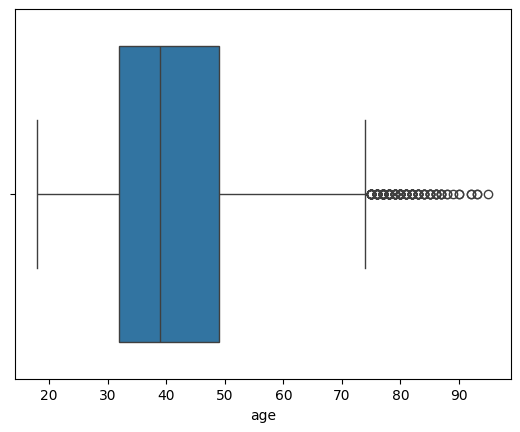

In [ ]:
sns.boxplot(x=bank["age"])

<ipython-input-9-edfb9ec46e48>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank.age, bins=100)


<Axes: xlabel='age', ylabel='Density'>

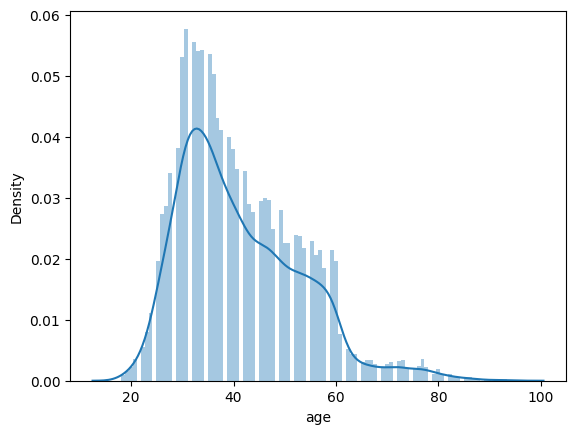

In [ ]:
sns.distplot(bank.age, bins=100)

<Axes: xlabel='duration'>

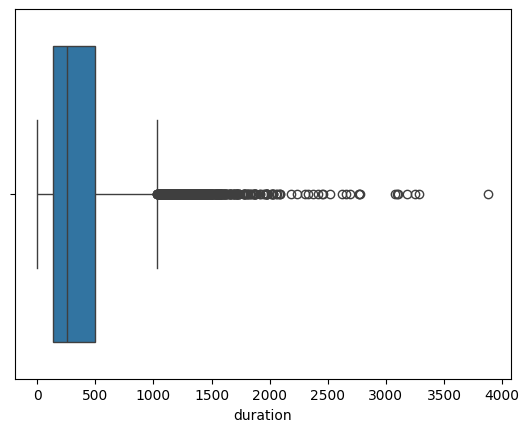

In [ ]:
sns.boxplot(x=bank["duration"])

<ipython-input-11-e094ef05df0c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bank.duration, bins=100)


<Axes: xlabel='duration', ylabel='Density'>

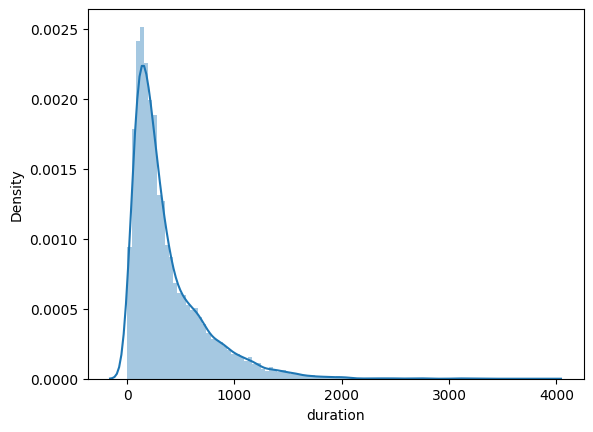

In [ ]:
sns.distplot(bank.duration, bins=100)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
def tocheckspace(k,Sheet):
    for i in Sheet:
      for j in k:
        print(i,'=',sum(Sheet[i]==j))

In [ ]:
bankdata=bank.copy()

In [ ]:
bankdata.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
tocheckunique(bankdata)

age 

[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89] 

job 

['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'] 

marital 

['married' 'single' 'divorced'] 

education 

['secondary' 'tertiary' 'primary' 'unknown'] 

default 

['no' 'yes'] 

balance 

[2343   45 1270 ... 1594 2593 -134] 

housing 

['yes' 'no'] 

loan 

['no' 'yes'] 

contact 

['unknown' 'cellular' 'telephone'] 

day 

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31] 

month 

['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep'] 

duration 

[1042 1467 1389 ... 1504  818 1812] 

campaign 

[ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 

In [ ]:

fig = px.box(data_frame=bankdata, y='age')
fig.show()

fig = px.box(data_frame=bankdata, y='balance')
fig.show()

fig = px.box(data_frame=bankdata, y='day')
fig.show()

fig = px.box(data_frame=bankdata, y='duration')
fig.show()

fig = px.box(data_frame=bankdata, y='campaign')
fig.show()

fig = px.box(data_frame=bankdata, y='pdays')
fig.show()

fig = px.box(data_frame=bankdata, y='previous')
fig.show()

In [ ]:
print("data before removing outliers")
print(bankdata.head)
print(bankdata.shape)

data before removing outliers
<bound method NDFrame.head of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact

In [ ]:
data_without_outliers = bankdata[(bankdata['balance'] >= -2282) & (bankdata['balance'] <= 4089)]

In [ ]:
print("data after removing outliers")
print(data_without_outliers.head)
print(data_without_outliers.shape)

data after removing outliers
<bound method NDFrame.head of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact 

In [ ]:
bankdata=data_without_outliers.copy()

In [ ]:
data_without_outliers=bankdata[(bankdata['age'] >= 10) & (bankdata['age'] <= 75)]

In [ ]:
print("data after removing outliers")
print(data_without_outliers.head)
print(data_without_outliers.shape)

data after removing outliers
<bound method NDFrame.head of        age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact 

In [ ]:

bankdata['age_category'] = pd.cut(bankdata['age'], bins=[0, 25, 35, 45, 55, 65, 100], labels=['<25', '25-35', '35-45', '45-55', '55-65', '65+'])


bankdata['balance_category'] = pd.cut(bankdata['balance'], bins=[-np.inf, 0, 1000, 5000, np.inf], labels=['Negative', 'Low', 'Medium', 'High'])


bankdata['duration_category'] = pd.cut(bankdata['duration'], bins=[0, 100, 300, 600, np.inf], labels=['Short', 'Medium', 'Long', 'Very Long'])


bankdata['campaign_type'] = bankdata['campaign'].apply(lambda x: 'Low' if x <= 5 else 'High')

bankdata['previous_interaction'] = bankdata['previous'].apply(lambda x: 'No Interaction' if x == 0 else 'Interaction')

bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,age_category,balance_category,duration_category,campaign_type,previous_interaction
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,...,1,-1,0,unknown,yes,55-65,Medium,Very Long,Low,No Interaction
1,56,admin.,married,secondary,no,45,no,no,unknown,5,...,1,-1,0,unknown,yes,55-65,Low,Very Long,Low,No Interaction
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,...,1,-1,0,unknown,yes,35-45,Medium,Very Long,Low,No Interaction
3,55,services,married,secondary,no,2476,yes,no,unknown,5,...,1,-1,0,unknown,yes,45-55,Medium,Long,Low,No Interaction
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,...,2,-1,0,unknown,yes,45-55,Low,Very Long,Low,No Interaction


In [ ]:
from sklearn.preprocessing import LabelEncoder
def encode (sheet):
    for col in sheet.columns:
        if sheet[col].dtype == 'object' or sheet[col].dtype == 'category':
            le = LabelEncoder()
            sheet[col] = le.fit_transform(sheet[col])
    return sheet
bankdata = encode(bankdata)
bankdata.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,deposit,age_category,balance_category,duration_category,campaign_type,previous_interaction
0,59,0,1,1,0,2343,1,0,2,5,...,1,-1,0,3,1,3,1,3,1,1
1,56,0,1,1,0,45,0,0,2,5,...,1,-1,0,3,1,3,0,3,1,1
2,41,9,1,1,0,1270,1,0,2,5,...,1,-1,0,3,1,1,1,3,1,1
3,55,7,1,1,0,2476,1,0,2,5,...,1,-1,0,3,1,2,1,0,1,1
4,54,0,1,2,0,184,0,0,2,5,...,2,-1,0,3,1,2,0,3,1,1


In [ ]:
bankdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10109 entries, 0 to 11161
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   age                   10109 non-null  int64
 1   job                   10109 non-null  int64
 2   marital               10109 non-null  int64
 3   education             10109 non-null  int64
 4   default               10109 non-null  int64
 5   balance               10109 non-null  int64
 6   housing               10109 non-null  int64
 7   loan                  10109 non-null  int64
 8   contact               10109 non-null  int64
 9   day                   10109 non-null  int64
 10  month                 10109 non-null  int64
 11  duration              10109 non-null  int64
 12  campaign              10109 non-null  int64
 13  pdays                 10109 non-null  int64
 14  previous              10109 non-null  int64
 15  poutcome              10109 non-null  int64
 16  deposit  

In [ ]:
x = bankdata.drop(['age','deposit','balance','duration','campaign','previous'], axis=1)
y=bankdata.deposit
print(x.head)
print(y.head)

<bound method NDFrame.head of        job  marital  education  default  housing  loan  contact  day  month  \
0        0        1          1        0        1     0        2    5      8   
1        0        1          1        0        0     0        2    5      8   
2        9        1          1        0        1     0        2    5      8   
3        7        1          1        0        1     0        2    5      8   
4        0        1          2        0        0     0        2    5      8   
...    ...      ...        ...      ...      ...   ...      ...  ...    ...   
11157    1        2          0        0        1     0        0   20      0   
11158    7        1          1        0        0     0        2   16      6   
11159    9        2          1        0        0     0        0   19      1   
11160    9        1          1        0        0     1        0    8      8   
11161    9        1          1        0        0     0        0    9      5   

       pdays  poutcom

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
x_train

,job,marital,education,default,housing,loan,contact,day,month,pdays,poutcome,age_category,balance_category,duration_category,campaign_type,previous_interaction
1812,0,1,1,0,1,0,0,6,8,-1,3,0,2,3,1,1
4727,1,1,1,0,1,0,2,4,5,-1,3,1,1,1,1,1
6249,5,2,0,0,0,0,0,9,11,-1,3,4,0,0,1,1
10238,7,2,1,0,1,1,2,4,6,-1,3,0,0,2,1,1
4236,0,2,1,0,0,0,0,12,3,-1,3,5,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10189,7,0,0,0,1,1,2,29,8,-1,3,1,0,1,1,1
5476,1,1,2,0,1,1,0,6,8,-1,3,0,0,1,1,1
3691,8,2,1,0,0,0,1,8,5,-1,3,5,0,0,1,1
10873,1,1,0,0,1,1,1,9,3,196,0,2,0,2,1,0


In [ ]:
x_test

,job,marital,education,default,housing,loan,contact,day,month,pdays,poutcome,age_category,balance_category,duration_category,campaign_type,previous_interaction
9089,5,1,1,0,0,0,0,24,5,-1,3,3,0,0,1,1
10081,1,1,0,0,1,0,0,30,5,-1,3,1,2,2,1,1
3403,10,2,0,0,0,0,0,12,0,-1,3,5,0,1,1,1
2034,0,0,1,0,1,0,0,15,8,-1,3,1,0,3,1,1
10941,3,2,0,0,1,0,0,3,3,265,0,2,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5558,7,2,0,0,0,0,2,6,6,-1,3,1,0,0,1,1
8068,0,1,1,0,1,0,2,26,8,-1,3,0,0,0,1,1
5919,3,1,0,0,0,0,2,14,8,-1,3,2,0,2,1,1
3335,5,1,1,0,0,1,0,12,7,339,0,4,0,1,1,0


In [ ]:
y_train

1812     1
4727     1
6249     0
10238    0
4236     1
        ..
10189    0
5476     0
3691     1
10873    0
3101     1
Name: deposit, Length: 8087, dtype: int64

In [ ]:
y_test

9089     0
10081    0
3403     1
2034     1
10941    0
        ..
5558     0
8068     0
5919     0
3335     1
2149     1
Name: deposit, Length: 2022, dtype: int64

In [ ]:

dt_params = {'criterion': 'entropy',
             'max_depth': 12,
             'max_features': None,
             'min_samples_leaf': 4,
             'min_samples_split': 12}
dt = DecisionTreeClassifier(**dt_params, random_state=0)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=4,
                       min_samples_split=12, random_state=0)

In [ ]:
y_pred=dt.predict(x_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.8100890207715133
Precision: 0.782560706401766
Recall: 0.7912946428571429
F1-score: 0.7869034406215316


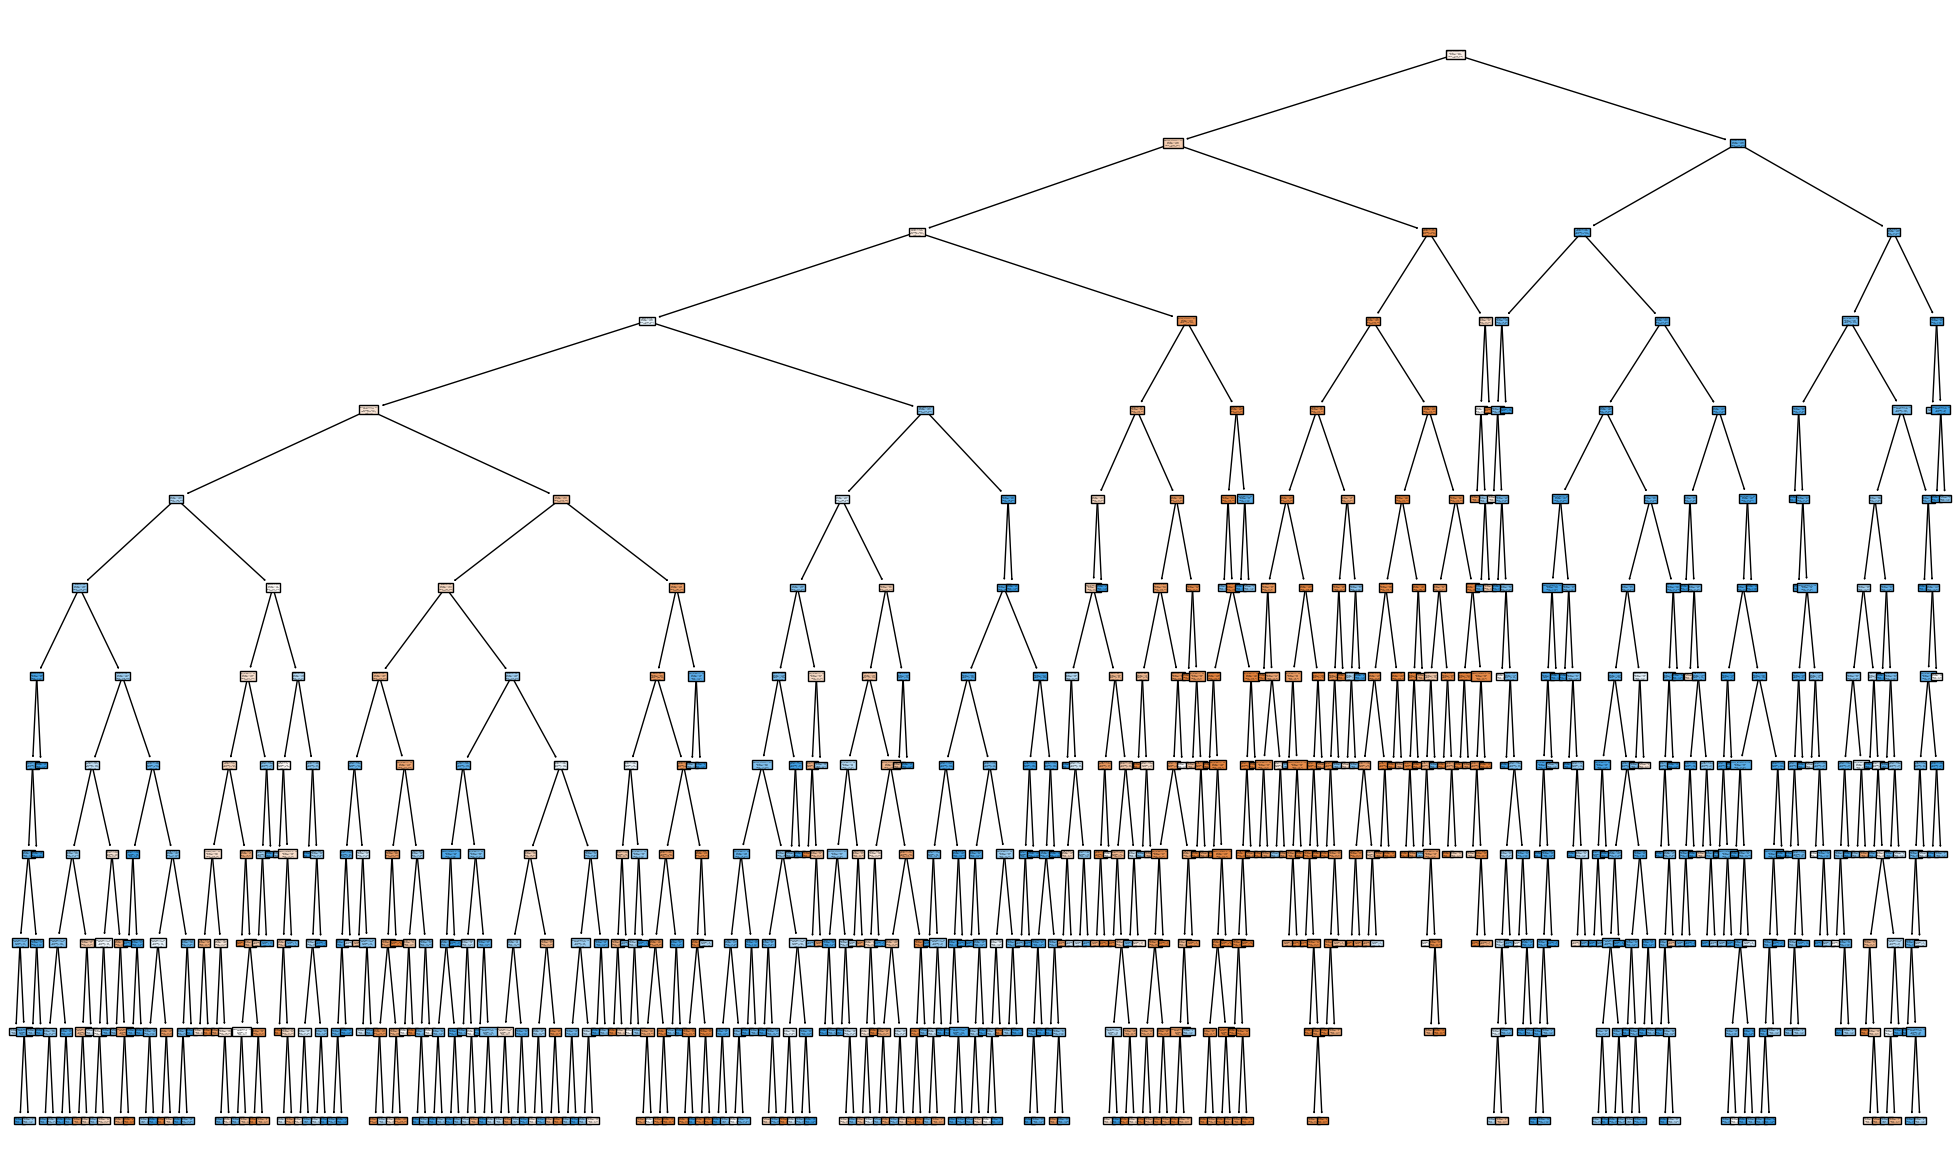

In [ ]:
plt.figure(figsize=(25,15))
tree.plot_tree(dt, filled=True, feature_names=x.columns, class_names=["No", "Yes"])
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(dt, out_file='Decision_tree_02.dot', feature_names=x.columns, filled=True, rounded=True)